# Clase 19: Diseño Experimental IV



# Diseño Factorial Completamente Aleatorizado (CRFD): Caso $2^k$

Para abrir en Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase19_DisenoExperimentalV.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Caso de estudio: Identificación de variables que afectan la medición de voltaje en el laboratorio

In [ ]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q # datasets de R
!pip install scikit-learn -q # Análisis relacionados a Machine Learning
!pip install pingouin -q # Análisis estadísticos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Set de datos
import pandas as pd
A_var = [22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32]
X_a = [-1 if x == 22 else 1 for x in A_var]
B_var = [0.5, 0.5, 5, 5, 0.5, 0.5, 5, 5, 0.5, 0.5, 5, 5, 0.5, 0.5, 5, 5]
X_b = [-1 if x == 0.5 else 1 for x in B_var]
C_var = [0.5, 0.5, 0.5, 0.5, 5, 5, 5, 5, 0.5, 0.5, 0.5, 0.5, 5, 5, 5, 5]
X_c = [-1 if x == 0.5 else 1 for x in C_var]
y = [705, 620, 700, 629, 672, 668, 715, 647, 680, 651, 685, 635, 654, 691, 672, 673]

df_volt = pd.DataFrame()
df_volt['A_var'] = A_var
df_volt['B_var'] = B_var
df_volt['C_var'] = C_var
df_volt['X_a'] = X_a
df_volt['X_b'] = X_b
df_volt['X_c'] = X_c
df_volt['response'] = y
df_volt


,A_var,B_var,C_var,X_a,X_b,X_c,response
0,22,0.5,0.5,-1,-1,-1,705
1,32,0.5,0.5,1,-1,-1,620
2,22,5.0,0.5,-1,1,-1,700
3,32,5.0,0.5,1,1,-1,629
4,22,0.5,5.0,-1,-1,1,672
5,32,0.5,5.0,1,-1,1,668
6,22,5.0,5.0,-1,1,1,715
7,32,5.0,5.0,1,1,1,647
8,22,0.5,0.5,-1,-1,-1,680
9,32,0.5,0.5,1,-1,-1,651


In [ ]:
# linear model
from statsmodels.formula.api import ols
import numpy as np

def encode(x):
    num = x - np.mean([np.max(x), np.min(x)])
    den = (np.max(x) - np.min(x))/2
    return num/den
model_volt = ols('response ~ (encode(A_var))*(encode(B_var))*(encode(C_var))',
                 data=df_volt).fit()
# Se obtiene el mismo resultado usando la formula
# response ~ X_a * X_b * X_c
print(model_volt.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     3.869
Date:                Sat, 24 May 2025   Prob (F-statistic):             0.0385
Time:                        22:17:26   Log-Likelihood:                -63.467
No. Observations:                  16   AIC:                             142.9
Df Residuals:                       8   BIC:                             149.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


Analizamos la interacción que ocurre entre la temperatura A y el tiempo de calentamiento C.

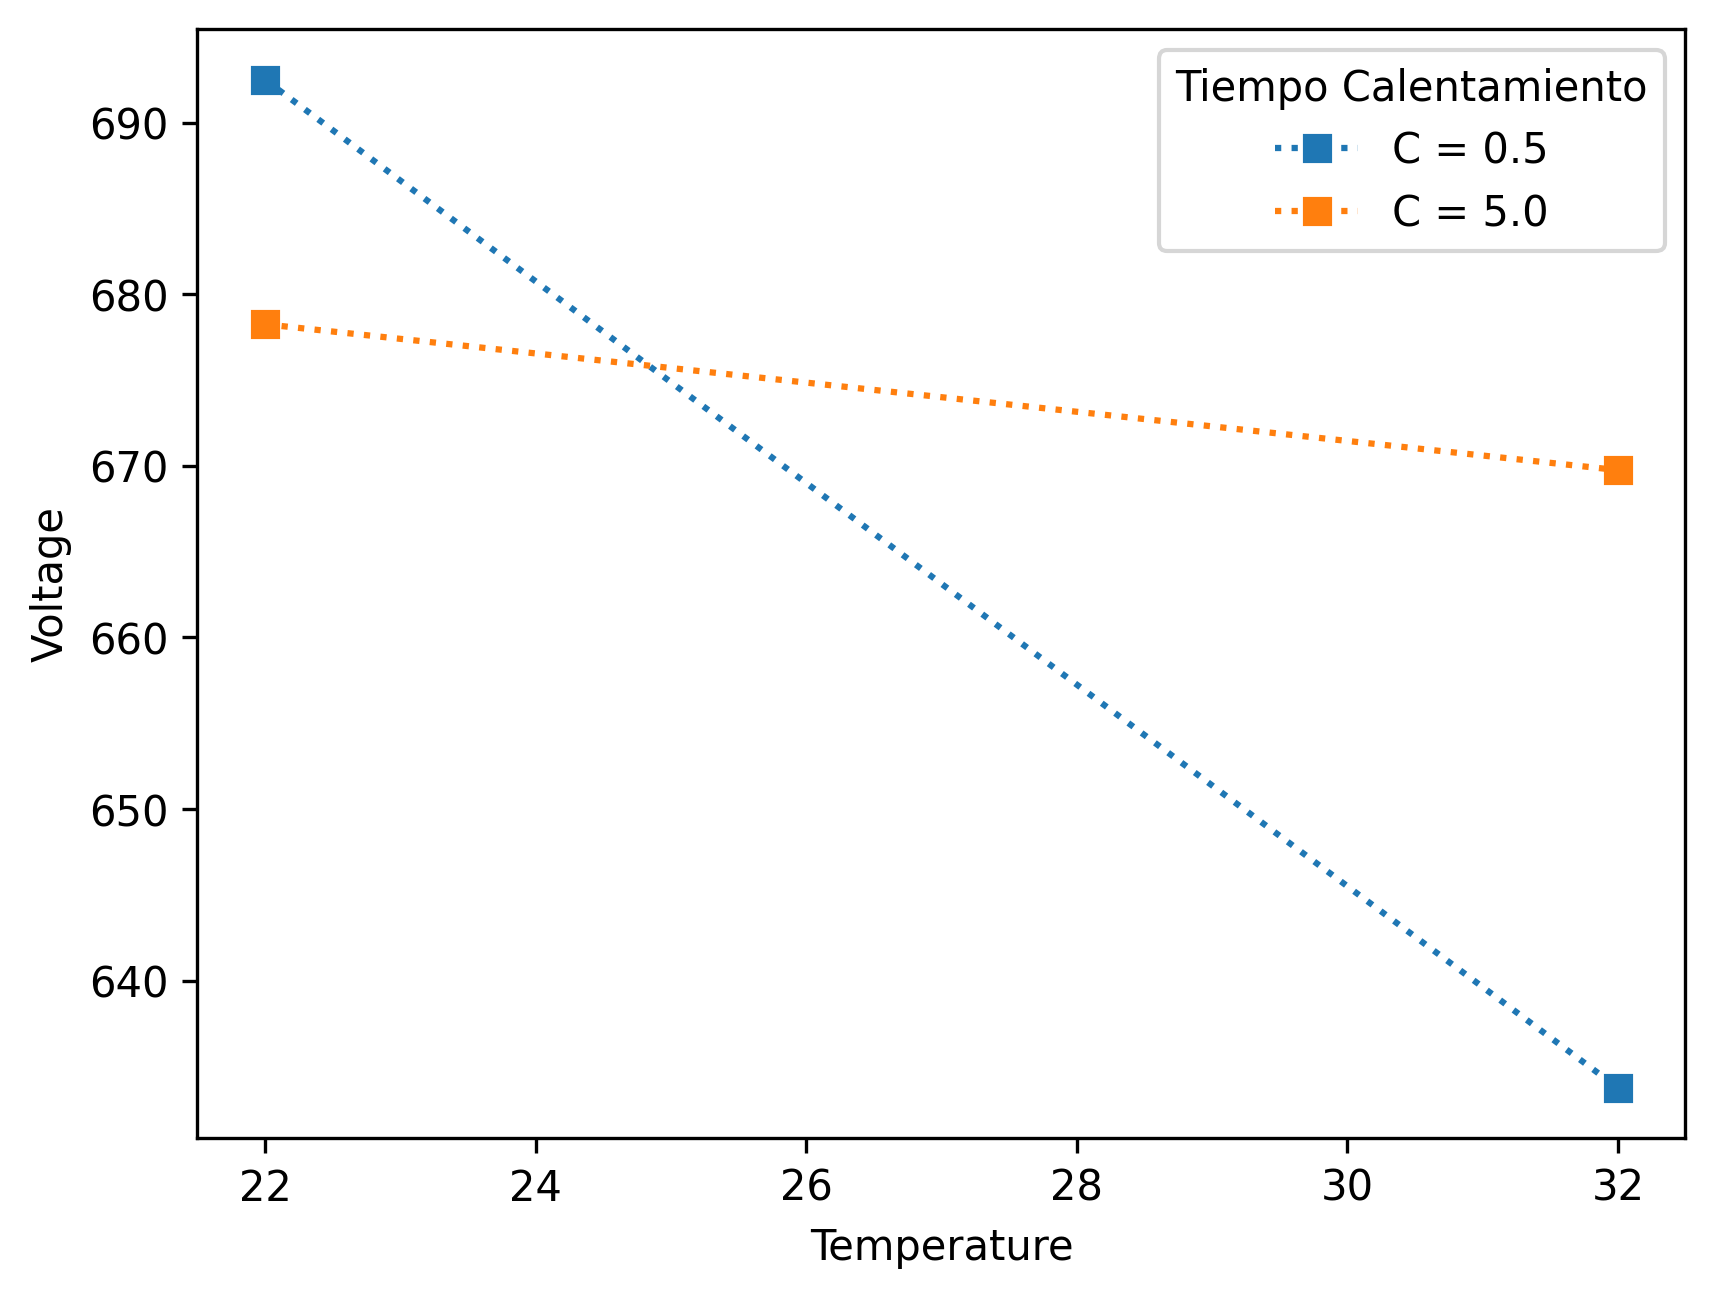

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi = 300)

for C_w in df_volt['C_var'].unique():
    C_response = df_volt[df_volt['C_var'] == C_w]
    average_response_A = C_response.groupby('A_var').mean()['response']
    ax.plot(average_response_A.index, average_response_A, linestyle = ':', label = f'C = {C_w}', marker = 's')


ax.set_xlabel('Temperature')
ax.legend( title="Tiempo Calentamiento")
ax.set_ylabel('Voltage')

plt.show()

Gracias a la codificación de los niveles es posible eliminar las variables no significativas sin tener que recalcular nuevamente todos los coeficientes del modelo.
De esta forma, el modelo con los efectos más significativos queda definido por:

$$
y = 668.563 - 16.813 \left(\frac{Temp - 27}{5}\right) + 12.5625 \left(\frac{C_{warm} - 2.75}{2.25}\right)\left( \frac{Temp-27}{5}\right)
$$